In [2]:
from tigertail import TimeFrame, TimeSeries, EventSeries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the dataset used in this notebook from: https://zenodo.org/records/4114005

In [3]:
data_path = '../data/anon_student_data.csv'
student_df = pd.read_csv(data_path)
student_df

,first_course_year,semester_idx,female,white_asian,start_age,first_gen,HS_Zip_Code,changed_major,n_majors,total_semester_credit_hours,...,Geography,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Households,Number; Estimate; FAMILIES - Families,Number; Margin of Error; FAMILIES - Families,Median income (dollars); Estimate; FAMILIES - Families,Median income (dollars); Margin of Error; FAMILIES - Families,zipstr,zip_median_income_log,anon_id
0,13.0,1.0,1.0,1.0,19.0,0.0,NaN,0.0,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125713
1,17.0,1.0,1.0,1.0,18.0,1.0,48867,0.0,2.0,14.0,...,ZCTA5 48867,43388.0,2198.0,7417.0,211.0,56442.0,4490.0,48867.0,4.751602,160343
2,3.0,1.0,0.0,1.0,26.0,0.0,NaN,0.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34721
3,0.0,1.0,0.0,1.0,18.0,0.0,34652,0.0,1.0,15.0,...,ZCTA5 34652,36329.0,3082.0,5958.0,369.0,48205.0,3885.0,34652.0,4.683092,6446
4,9.0,1.0,0.0,1.0,18.0,0.0,48346,0.0,1.0,15.0,...,ZCTA5 48346,74958.0,5627.0,6288.0,294.0,88802.0,7348.0,48346.0,4.948423,84932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553519,9.0,16.0,1.0,1.0,18.0,0.0,60030,0.0,1.0,13.0,...,ZCTA5 60030,83680.0,3258.0,9698.0,290.0,105239.0,4370.0,60030.0,5.022177,91426
1553520,8.0,16.0,1.0,1.0,18.0,0.0,48820,0.0,1.0,5.0,...,ZCTA5 48820,82964.0,3961.0,4905.0,238.0,96399.0,5734.0,48820.0,4.984073,78620
1553521,5.0,16.0,0.0,0.0,19.0,0.0,20011,0.0,1.0,6.0,...,ZCTA5 20011,65327.0,3261.0,13424.0,493.0,85369.0,8525.0,20011.0,4.931300,55141
1553522,16.0,16.0,1.0,1.0,19.0,1.0,48161,0.0,8.0,20.0,...,ZCTA5 48161,49627.0,3809.0,7110.0,251.0,61250.0,3619.0,48161.0,4.787106,152752


In [41]:
# create a dataframe of the major_gpa data

major_gpa_df = student_df[['semester_idx', 'anon_id', 'major_gpa']]
major_gpa_df

,semester_idx,anon_id,major_gpa
0,1.0,125713,0.000000
1,1.0,160343,1.500000
2,1.0,34721,2.333333
3,1.0,6446,0.000000
4,1.0,84932,1.300000
...,...,...,...
1553519,16.0,91426,1.500000
1553520,16.0,78620,3.250000
1553521,16.0,55141,2.000000
1553522,16.0,152752,1.083333


              major_gpa
semester_idx           
1.0                 0.7
2.0                 0.0
3.0                 1.6
4.0                 1.5
5.0                 0.0
6.0                 1.6
7.0                 2.4
9.0                 2.4
10.0                2.0


<Axes: xlabel='semester_idx'>

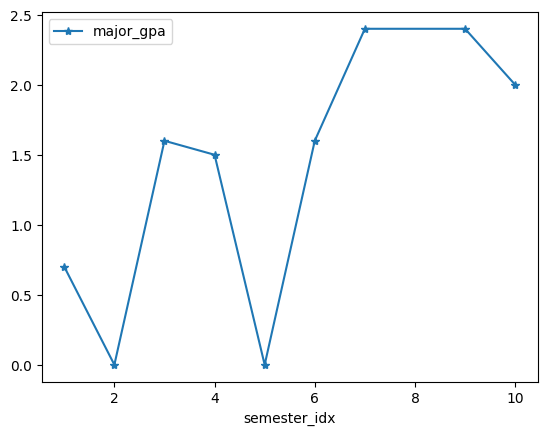

In [51]:
# We need to either make a TimeSeries object for each student or multilevel indexed dataframe
# For now, pick one student and create a TimeSeries object using their major_gpa data

student_mask = major_gpa_df['anon_id'] == 111292
student_major_gpa_df = pd.DataFrame(major_gpa_df[student_mask])
student_major_gpa_df = student_major_gpa_df.set_index('semester_idx').drop(['anon_id'], axis=1)
print(student_major_gpa_df)

student_major_gpa_ts = TimeSeries(student_major_gpa_df, agg_func=np.max)
student_major_gpa_ts.data.plot(marker='*')

In [ ]:
# window the data - need to be able to window based on non-default frequencies
# '2sem' means 2-semester long windows

# student_major_gpa_ts.window('2sem').plot()

In [52]:
# create a dataframe of changed_major data

changed_major_df = student_df[['semester_idx', 'changed_major', 'anon_id']]
changed_major_df

,semester_idx,changed_major,anon_id
0,1.0,0.0,125713
1,1.0,0.0,160343
2,1.0,0.0,34721
3,1.0,0.0,6446
4,1.0,0.0,84932
...,...,...,...
1553519,16.0,0.0,91426
1553520,16.0,0.0,78620
1553521,16.0,0.0,55141
1553522,16.0,0.0,152752


              changed_major
semester_idx               
1.0                     0.0
2.0                     1.0
3.0                     0.0
4.0                     0.0
5.0                     0.0
6.0                     0.0
7.0                     0.0
9.0                     0.0
10.0                    0.0


<Axes: xlabel='semester_idx'>

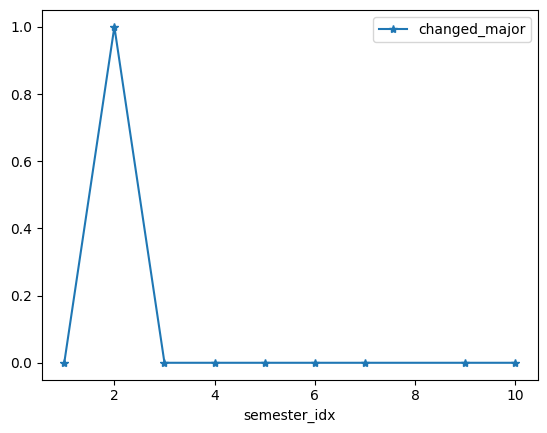

In [57]:
student_mask = changed_major_df['anon_id'] == 111292
student_changed_major_df = pd.DataFrame(changed_major_df[student_mask])
student_changed_major_df = student_changed_major_df.set_index('semester_idx').drop(['anon_id'], axis=1)
print(student_changed_major_df)

student_changed_major_es = EventSeries(student_changed_major_df, agg_func=np.max)
student_changed_major_es.data.plot(marker='*')